In [113]:
import sys
import scipy
import numpy
import matplotlib 
import pandas
import sklearn

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler

In [115]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import naive_bayes

In [3]:
import numpy as np
import pandas as pd
xl = pd.ExcelFile("C:/Users/Lina/Desktop/Socio économique 03_20_2019 13_48_43.xlsx")
xl.sheet_names

['Tableau']

In [4]:
df = xl.parse("Tableau")

In [119]:
###df.columns

In [120]:
###df['Unnamed: 1'].head()

In [5]:
df=df.drop(['Unnamed: 1'],axis=1)

In [122]:
###df.head()

In [123]:
###df['Socio économique\n\nTunisie; Unité'][0]="Date"

In [6]:
df_colums=np.array(df.columns)
df_colums_ln=len(df_colums)
reponces={}

for i in df_colums:
    reponces[i]=df[i].unique()

###reponces['Socio économique\n\nTunisie; Unité']

In [7]:
dtitle=pd.Series(['DATE',
       'Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)',
       'manufacturière',
       'agro-alimentaires',
       'viandes',
       'poisson',
       'fruits et légumes',
       'huiles et corps gras',
       'laitière',
       'Travail des grains, fabrication de produits amylacés',
       "Fabrication d'aliments pour animaux",
       'Autres industries alimentaires',
       'Industrie des boissons',
       'Industrie du tabac',
       'Matériaux de construction, céramique et verre',
       'Extraction de pierres',
       "Extraction de sables et d'argiles",
       "Fabrication de verre et d'articles en verre",
       'Fabrication de produits céramiques, autres que pour la construction',
       'Fabrication de carreaux en céramique',
       'Fabrication de tuiles et briques en terre cuite',
       'Fabrication de ciment, chaux et plâtre',
       "Fabrication d'ouvrages en béton ou en plâtre",
       'Travail de la pierre',
       'industries mécaniques et électriques',
       'Metallurgie',
       'Travail des metaux',
       'Fabrication de machines et equipements',
       'Fabrication de machines et appareils electriques',
       "Fabrication d'equipements de radio, television et communication",
       "Fabrication d'instruments medicaux, de precision, d'optique et d'horlogerie",
       'Industrie automobile',
       "Fabrication d'autres materiels de transport",
       'Chimie',
       'Industrie chimique de base',
       'Fabrication de peintures et vernis',
       'Industrie pharmaceutique',
       "Fabrication de savons, de parfums et de produits d'entretien",
       "Fabrication d'autres produits chimiques",
       'Industrie du caoutchouc',
       'Textile',
       'Industrie textile',
       "Industrie d'habillement et des fourrures",
       'Industrie du cuir et de la chaussure',
       'Industries divers',
       "Travail du bois et fabrication d'articles en bois",
       'Industrie du papier et du carton',
       'Edition, imprimerie, reproduction',
       'Transformation des matières plastiques',
       'Fabrication de meubles et industries diverses',
       'Mines',
       "Extraction de minéraux pour l'industrie chimique et d'engrais naturels",
       'Production de sel',
       'Energie',
       "Extraction d'hydrocarbures",
       'Raffinage de pétrole',
       "Production et distribution d'électricité",
       "Captage, traitement et distribution d'eau",
       "Indice d'ensemble pour les prix de la vente industriel (IPVI) (2010 = 100)"])

In [126]:
###df['Socio économique\n\nTunisie; Unité'].head()

In [8]:
df['Socio économique\n\nTunisie; Unité']=dtitle

In [9]:
df.rename(columns = {'Socio économique\n\nTunisie; Unité':'INDICES'}, inplace = True)

In [10]:
df.head(2)

INDICES Unnamed: 2 Unnamed: 3  \
0                                               DATE   Jan 2000   Fév 2000   
1  Indices  des  prix  à  la  vente  industriel (...       65.3       65.3   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0   Mar 2000   Avr 2000   Mai 2000   Jui 2000   Jul 2000   Aoû 2000   
1       65.3       65.3       65.4       65.2       65.3       65.8   

  Unnamed: 10     ...      Unnamed: 220 Unnamed: 221 Unnamed: 222  \
0    Sep 2000     ...          Mar 2018     Avr 2018     Mai 2018   
1          66     ...             135.3        136.2        137.5   

  Unnamed: 223 Unnamed: 224 Unnamed: 225 Unnamed: 226 Unnamed: 227  \
0     Jui 2018     Jul 2018     Aoû 2018     Sep 2018     Oct 2018   
1          139        140.2        140.7        141.8        142.7   

  Unnamed: 228 Unnamed: 229  
0     Nov 2018     Déc 2018  
1        143.3        143.6  

[2 rows x 229 columns]

In [11]:
df.set_index('INDICES', inplace=True)

In [12]:
df.head(3)

Unnamed: 2 Unnamed: 3  \
INDICES                                                                    
DATE                                                 Jan 2000   Fév 2000   
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.3   
manufacturière                                           71.8       71.7   

                                                   Unnamed: 4 Unnamed: 5  \
INDICES                                                                    
DATE                                                 Mar 2000   Avr 2000   
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.3   
manufacturière                                           71.7       71.7   

                                                   Unnamed: 6 Unnamed: 7  \
INDICES                                                                    
DATE                                                 Mai 2000   Jui 2000   
Indices  des  prix  à  la  vente  industriel (I...       65.4       65.2   
manufacturière                                           71.7       71.7   

                                                   Unnamed: 8 Unnamed: 9  \
INDICES                                                                    
DATE                                                 Jul 2000   Aoû 2000   
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.8   
manufacturière                                           71.7       71.9   

                                                   Unnamed: 10 Unnamed: 11  \
INDICES                                                                      
DATE                                                  Sep 2000    Oct 2000   
Indices  des  prix  à  la  vente  industriel (I...          66        66.1   
manufacturière                                            72.1        72.3   

                                                       ...      Unnamed: 220  \
INDICES                                                ...                     
DATE                                                   ...          Mar 2018   
Indices  des  prix  à  la  vente  industriel (I...     ...             135.3   
manufacturière                                         ...             133.8   

                                                   Unnamed: 221 Unnamed: 222  \
INDICES                                                                        
DATE                                                   Avr 2018     Mai 2018   
Indices  des  prix  à  la  vente  industriel (I...        136.2        137.5   
manufacturière                                            134.8        136.1   

                                                   Unnamed: 223 Unnamed: 224  \
INDICES                                                                        
DATE                                                   Jui 2018     Jul 2018   
Indices  des  prix  à  la  vente  industriel (I...          139        140.2   
manufacturière                                            137.6          139   

                                                   Unnamed: 225 Unnamed: 226  \
INDICES                                                                        
DATE                                                   Aoû 2018     Sep 2018   
Indices  des  prix  à  la  vente  industriel (I...        140.7        141.8   
manufacturière                                            139.4          140   

                                                   Unnamed: 227 Unnamed: 228  \
INDICES                                                                        
DATE                                                   Oct 2018     Nov 2018   
Indices  des  prix  à  la  vente  industriel (I...        142.7        143.3   
manufacturière                                              141        141.4   

                                                   Unnamed: 229  
INDICES                                                          

In [13]:
df.index[0]

'DATE'

In [14]:
###df.index

In [15]:
df.iloc[1:, :].head(2)

Unnamed: 2 Unnamed: 3  \
INDICES                                                                    
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.3   
manufacturière                                           71.8       71.7   

                                                   Unnamed: 4 Unnamed: 5  \
INDICES                                                                    
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.3   
manufacturière                                           71.7       71.7   

                                                   Unnamed: 6 Unnamed: 7  \
INDICES                                                                    
Indices  des  prix  à  la  vente  industriel (I...       65.4       65.2   
manufacturière                                           71.7       71.7   

                                                   Unnamed: 8 Unnamed: 9  \
INDICES                                                                    
Indices  des  prix  à  la  vente  industriel (I...       65.3       65.8   
manufacturière                                           71.7       71.9   

                                                   Unnamed: 10 Unnamed: 11  \
INDICES                                                                      
Indices  des  prix  à  la  vente  industriel (I...          66        66.1   
manufacturière                                            72.1        72.3   

                                                       ...      Unnamed: 220  \
INDICES                                                ...                     
Indices  des  prix  à  la  vente  industriel (I...     ...             135.3   
manufacturière                                         ...             133.8   

                                                   Unnamed: 221 Unnamed: 222  \
INDICES                                                                        
Indices  des  prix  à  la  vente  industriel (I...        136.2        137.5   
manufacturière                                            134.8        136.1   

                                                   Unnamed: 223 Unnamed: 224  \
INDICES                                                                        
Indices  des  prix  à  la  vente  industriel (I...          139        140.2   
manufacturière                                            137.6          139   

                                                   Unnamed: 225 Unnamed: 226  \
INDICES                                                                        
Indices  des  prix  à  la  vente  industriel (I...        140.7        141.8   
manufacturière                                            139.4          140   

                                                   Unnamed: 227 Unnamed: 228  \
INDICES                                                                        
Indices  des  prix  à  la  vente  industriel (I...        142.7        143.3   
manufacturière                                              141        141.4   

                                                   Unnamed: 229  
INDICES                                                          
Indices  des  prix  à  la  vente  industriel (I...        143.6  
manufacturière                                            141.6  

[2 rows x 228 columns]

In [17]:
dt=df.iloc[1:, :]
dt.columns=df.iloc[0, :]

In [18]:
dataset=pd.DataFrame()
dataset["Date"]=df.iloc[0, :]
dataset['Indices  des  prix  à  la  vente  industriel (IPVI)']=df.iloc[1, :]

In [19]:
for count, dte in enumerate(dataset["Date"]):
    
    if dte[0:3]=='Jan':
        dataset["Date"][count]=dte.replace('Jan ','-01-01')  
    elif dte[0:3]=='Fév':
        dataset["Date"][count]=dte.replace('Fév ','-02-01')
    elif dte[0:3]=='Mar':   
        dataset["Date"][count]=dte.replace('Mar ','-03-01')
    elif dte[0:3]=='Avr':    
        dataset["Date"][count]=dte.replace('Avr ','-04-01')
    elif dte[0:3]=='Mai': 
        dataset["Date"][count]=dte.replace('Mai ','-05-01')
    elif dte[0:3]=='Jui': 
        dataset["Date"][count]=dte.replace('Jui ','-06-01')
    elif dte[0:3]=='Jul':   
        dataset["Date"][count]=dte.replace('Jul ','-07-01')
    elif dte[0:3]=='Aoû':   
        dataset["Date"][count]=dte.replace('Aoû ','-08-01')
    elif dte[0:3]=='Sep':   
        dataset["Date"][count]=dte.replace('Sep ','-09-01')
    elif dte[0:3]=='Oct':  
        dataset["Date"][count]=dte.replace('Oct ','-10-01')
    elif dte[0:3]=='Nov':   
        dataset["Date"][count]=dte.replace('Nov ','-11-01')
    elif dte[0:3]=='Déc': 
        dataset["Date"][count]=dte.replace('Déc ','-12-01')

In [20]:
for count, dte in enumerate(dataset["Date"]):
    dataset["Date"][count]=dte[6:]+  dte[0:6]

In [21]:
import datetime as dt

for count, dte in enumerate(dataset["Date"]):   
    dataset["Date"][count]=dt.datetime.strptime(dte, '%Y-%m-%d') 

In [22]:
dataset.head()

Date  \
Unnamed: 2  2000-01-01 00:00:00   
Unnamed: 3  2000-02-01 00:00:00   
Unnamed: 4  2000-03-01 00:00:00   
Unnamed: 5  2000-04-01 00:00:00   
Unnamed: 6  2000-05-01 00:00:00   

           Indices  des  prix  à  la  vente  industriel (IPVI)  
Unnamed: 2                                               65.3   
Unnamed: 3                                               65.3   
Unnamed: 4                                               65.3   
Unnamed: 5                                               65.3   
Unnamed: 6                                               65.4

In [23]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6
from datetime import datetime

dataset['Date']=pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [25]:
indexedDataset.head()

Indices  des  prix  à  la  vente  industriel (IPVI)
Date                                                          
2000-01-01                                               65.3 
2000-02-01                                               65.3 
2000-03-01                                               65.3 
2000-04-01                                               65.3 
2000-05-01                                               65.4

In [26]:
plt.xlabel('Date')
plt.ylabel('Indices  des  prix  à  la  vente  industriel (IPVI)')
#dataset['Indices  des  prix  à  la  vente  industriel (IPVI)']
plt.plot(indexedDataset)

In [145]:
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
#print(rolmean,rolstd)

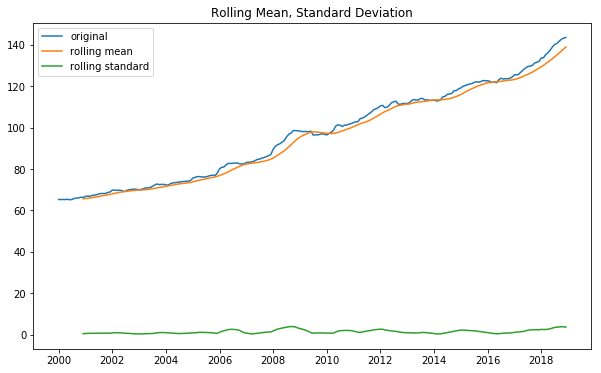

In [146]:
orig =plt.plot(indexedDataset, label='original')
mean =plt.plot(rolmean, label='rolling mean')
std =plt.plot(rolstd, label='rolling standard')
plt.legend(loc='best')
plt.title('Rolling Mean, Standard Deviation')
plt.show(block=False)

In [147]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest= adfuller(indexedDataset['Indices  des  prix  à  la  vente  industriel (IPVI)'], autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])

for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  2.032863
p-value                         0.998714
#Lags used                      1.000000
Number of observation used    226.000000
Critical value (1%)            -3.459620
Critical value (5%)            -2.874415
Critical value (10%)           -2.573632
dtype: float64


In [150]:
indexedDataset[indexedDataset.columns[0]].head(3)

Date
2000-01-01    65.3
2000-02-01    65.3
2000-03-01    65.3
Name: Indices  des  prix  à  la  vente  industriel (IPVI), dtype: object

In [158]:
indexedDataset_logScale=indexedDataset
indexedDataset_logScale[indexedDataset_logScale.columns[0]]=np.log(np.array(indexedDataset[indexedDataset.columns[0]].values).astype(np.float64))
plt.plot(indexedDataset_logScale)

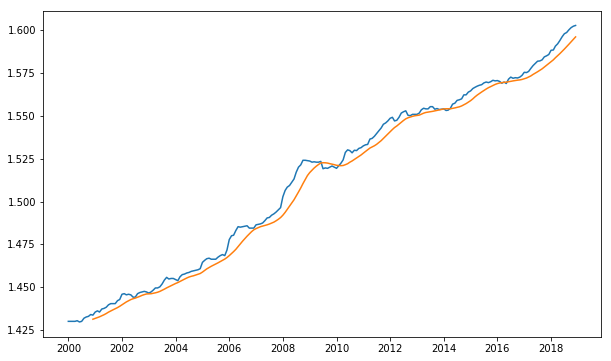

In [159]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movinSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage)

In [160]:
datasetLogScaleMinusMovingAverage =  indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

Indices  des  prix  à  la  vente  industriel (IPVI)
Date                                                           
2000-12-01                                           0.002388  
2001-01-01                                           0.003727  
2001-02-01                                           0.003927  
2001-03-01                                           0.002764  
2001-04-01                                           0.003938  
2001-05-01                                           0.003692  
2001-06-01                                           0.003678  
2001-07-01                                           0.004273  
2001-08-01                                           0.004258  
2001-09-01                                           0.003609

In [203]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(movingAverage, label='Rolling Mean')
    std = plt.plot(movingSTD, label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    dftest= adfuller(timeseries['Indices  des  prix  à  la  vente  industriel (IPVI)'], autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

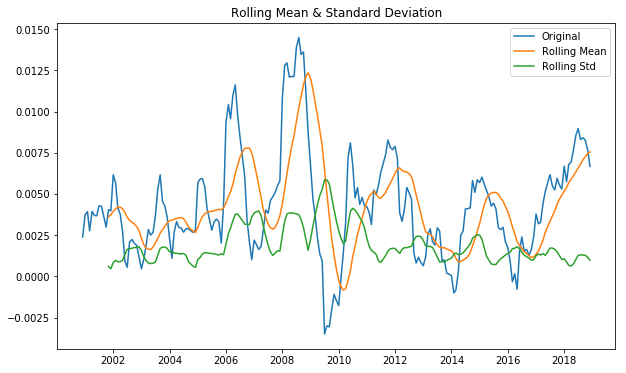

Test Statistic                 -3.741479
p-value                         0.003566
#Lags used                      1.000000
Number of observation used    215.000000
Critical value (1%)            -3.461136
Critical value (5%)            -2.875079
Critical value (10%)           -2.573986
dtype: float64


In [204]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [205]:
exponentialDecayweightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayweightedAverage)

In [206]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayweightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Test Statistic                 -2.482267
p-value                         0.119849
#Lags used                      1.000000
Number of observation used    226.000000
Critical value (1%)            -3.459620
Critical value (5%)            -2.874415
Critical value (10%)           -2.573632
dtype: float64


In [207]:
datasetLogDiffShifling= indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifling)

In [208]:
datasetLogDiffShifling.dropna(inplace=True)
test_stationarity(datasetLogDiffShifling)

Test Statistic                  0.159150
p-value                         0.969875
#Lags used                      1.000000
Number of observation used    225.000000
Critical value (1%)            -3.459752
Critical value (5%)            -2.874473
Critical value (10%)           -2.573663
dtype: float64


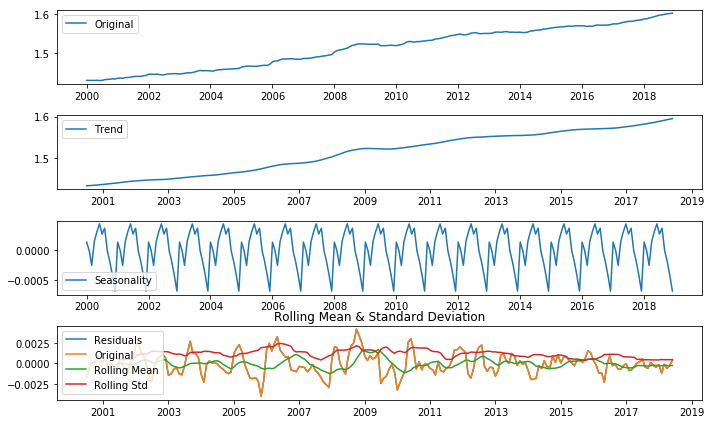

Test Statistic               -8.104931e+00
p-value                       1.270352e-12
#Lags used                    1.000000e+00
Number of observation used    2.140000e+02
Critical value (1%)          -3.461282e+00
Critical value (5%)          -2.875143e+00
Critical value (10%)         -2.574020e+00
dtype: float64


In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

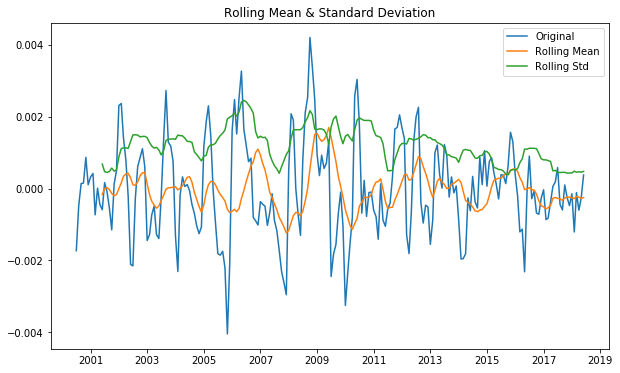

Test Statistic               -8.104931e+00
p-value                       1.270352e-12
#Lags used                    1.000000e+00
Number of observation used    2.140000e+02
Critical value (1%)          -3.461282e+00
Critical value (5%)          -2.875143e+00
Critical value (10%)         -2.574020e+00
dtype: float64


In [211]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

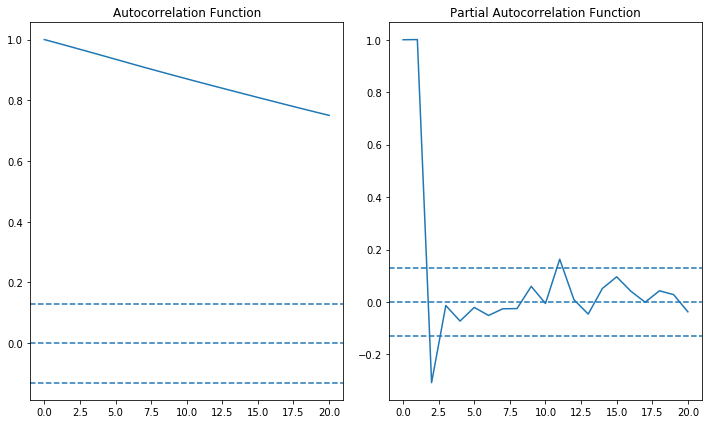

In [212]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifling, nlags=20)
lag_pacf = pacf(datasetLogDiffShifling, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


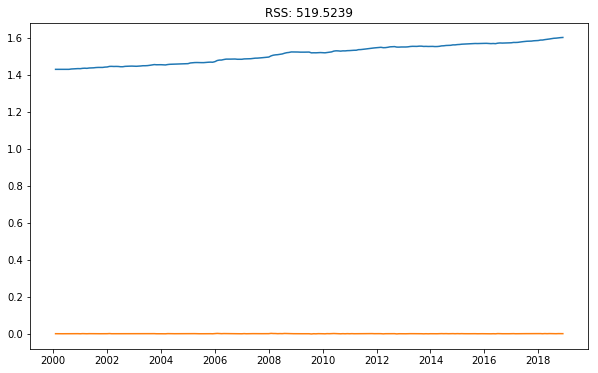

In [213]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp= -1)
plt.plot(datasetLogDiffShifling)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifling['Indices  des  prix  à  la  vente  industriel (IPVI)'])**2))
print('Plotting AR model')

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


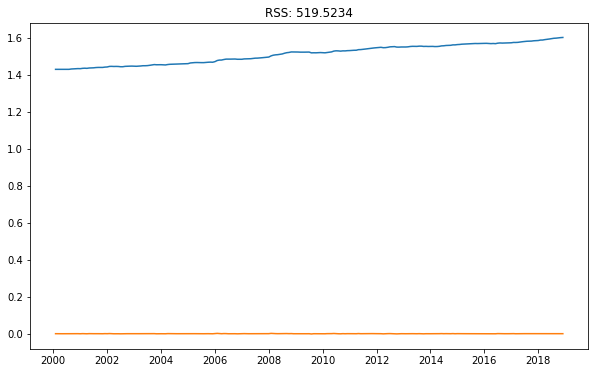

In [214]:
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp= -1)
plt.plot(datasetLogDiffShifling)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifling['Indices  des  prix  à  la  vente  industriel (IPVI)'])**2))
print('Plotting AR model')

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


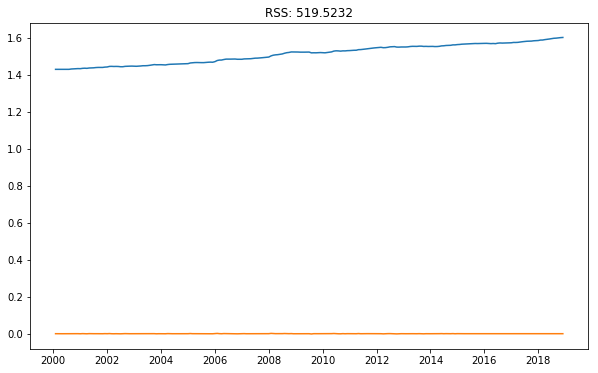

In [215]:
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp= -1)
plt.plot(datasetLogDiffShifling)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifling['Indices  des  prix  à  la  vente  industriel (IPVI)'])**2))
print('Plotting AR model')

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 519.5232')

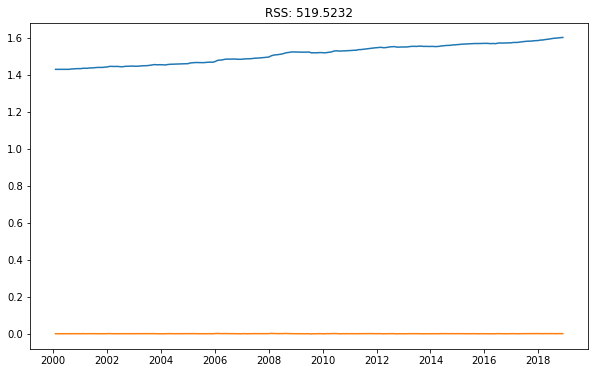

In [216]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp= -1)
plt.plot(datasetLogDiffShifling)
plt.plot(results_ARIMA.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifling['Indices  des  prix  à  la  vente  industriel (IPVI)'])**2))


In [217]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2000-02-01    0.000757
2000-03-01    0.000528
2000-04-01    0.000510
2000-05-01    0.000474
2000-06-01    0.000594
dtype: float64


In [218]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2000-02-01    0.000757
2000-03-01    0.001285
2000-04-01    0.001795
2000-05-01    0.002269
2000-06-01    0.002863
dtype: float64


In [219]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Indices  des  prix  à  la  vente  industriel (IPVI)'].ix[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value= 0)
predictions_ARIMA_log.head()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2000-01-01    1.430070
2000-02-01    1.430827
2000-03-01    1.431355
2000-04-01    1.431865
2000-05-01    1.432339
dtype: float64

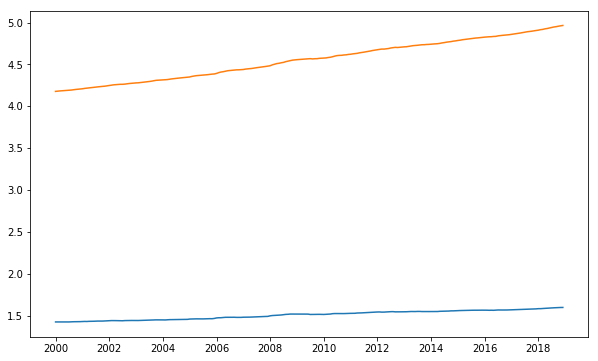

In [220]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [221]:
indexedDataset_logScale.head()

Indices  des  prix  à  la  vente  industriel (IPVI)
Date                                                           
2000-01-01                                           1.430070  
2000-02-01                                           1.430070  
2000-03-01                                           1.430070  
2000-04-01                                           1.430070  
2000-05-01                                           1.430436

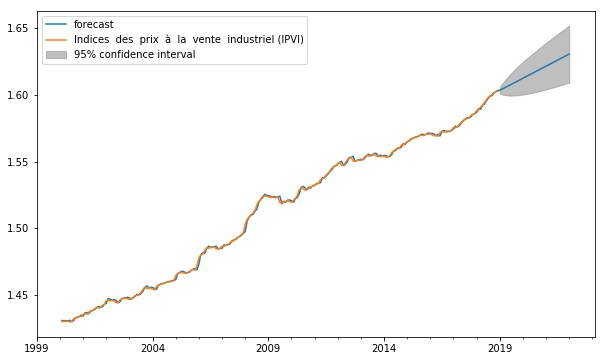

In [222]:
results_ARIMA.plot_predict(1,264)
x= results_ARIMA.forecast(steps=120)

In [240]:
x[1]

array([0.00115136, 0.00188608, 0.00247444, 0.00302126, 0.00349163,
       0.00393163, 0.00432434, 0.00469514, 0.00503502, 0.00535871,
       0.00566112, 0.00595109, 0.00622568, 0.00649036, 0.00674343,
       0.00698838, 0.00722424, 0.00745329, 0.007675  , 0.00789089,
       0.0081007 , 0.00830548, 0.00850512, 0.00870035, 0.00889116,
       0.00907807, 0.00926112, 0.00944069, 0.00961685, 0.00978989,
       0.00995988, 0.01012705, 0.01029149, 0.01045335, 0.01061273,
       0.01076977, 0.01092454, 0.01107715, 0.01122769, 0.01137623,
       0.01152286, 0.01166765, 0.01181066, 0.01195196, 0.01209161,
       0.01222967, 0.01236618, 0.01250121, 0.01263479, 0.01276697,
       0.0128978 , 0.01302732, 0.01315556, 0.01328256, 0.01340836,
       0.01353299, 0.01365648, 0.01377887, 0.01390017, 0.01402043,
       0.01413967, 0.01425791, 0.01437517, 0.01449149, 0.01460688,
       0.01472137, 0.01483497, 0.01494771, 0.01505961, 0.01517068,
       0.01528094, 0.01539042, 0.01549912, 0.01560706, 0.01571

In [202]:
len(x[1])

120

In [201]:
np.exp(x[1])

array([1.00115202, 1.00188786, 1.0024775 , 1.00302583, 1.00349773,
       1.00393937, 1.0043337 , 1.00470618, 1.00504772, 1.0053731 ,
       1.00567718, 1.00596883, 1.0062451 , 1.00651147, 1.00676622,
       1.00701285, 1.0072504 , 1.00748113, 1.00770453, 1.0079221 ,
       1.0081336 , 1.00834007, 1.00854139, 1.00873831, 1.0089308 ,
       1.0091194 , 1.00930413, 1.00948539, 1.00966324, 1.00983796,
       1.01000965, 1.01017851, 1.01034463, 1.01050818, 1.01066925,
       1.01082797, 1.01098443, 1.01113873, 1.01129095, 1.01144119,
       1.0115895 , 1.01173598, 1.01188068, 1.01202367, 1.01216501,
       1.01230476, 1.01244296, 1.01257968, 1.01271495, 1.01284882,
       1.01298134, 1.01311254, 1.01324247, 1.01337116, 1.01349865,
       1.01362497, 1.01375016, 1.01387423, 1.01399723, 1.01411918,
       1.01424011, 1.01436004, 1.01447899, 1.014597  , 1.01471408,
       1.01483026, 1.01494556, 1.01505999, 1.01517358, 1.01528634,
       1.01539829, 1.01550946, 1.01561985, 1.01572948, 1.01583

In [25]:
dt.head()

DATE                                               Jan 2000 Fév 2000 Mar 2000  \
INDICES                                                                         
Indices  des  prix  à  la  vente  industriel (I...     65.3     65.3     65.3   
manufacturière                                         71.8     71.7     71.7   
agro-alimentaires                                      68.7     68.8     68.7   
viandes                                                70.8     72.4     71.8   
poisson                                                74.4     74.4     74.4   

DATE                                               Avr 2000 Mai 2000 Jui 2000  \
INDICES                                                                         
Indices  des  prix  à  la  vente  industriel (I...     65.3     65.4     65.2   
manufacturière                                         71.7     71.7     71.7   
agro-alimentaires                                      68.5     68.3     68.1   
viandes                                                70.8     69.9     68.9   
poisson                                                74.4     74.4     74.4   

DATE                                               Jul 2000 Aoû 2000 Sep 2000  \
INDICES                                                                         
Indices  des  prix  à  la  vente  industriel (I...     65.3     65.8       66   
manufacturière                                         71.7     71.9     72.1   
agro-alimentaires                                      68.2     69.2     69.3   
viandes                                                69.5     70.6     71.2   
poisson                                                74.4     74.4     74.4   

DATE                                               Oct 2000   ...    Mar 2018  \
INDICES                                                       ...               
Indices  des  prix  à  la  vente  industriel (I...     66.1   ...       135.3   
manufacturière                                         72.3   ...       133.8   
agro-alimentaires                                      69.3   ...       141.7   
viandes                                                71.2   ...       172.7   
poisson                                                74.4   ...       185.8   

DATE                                               Avr 2018 Mai 2018 Jui 2018  \
INDICES                                                                         
Indices  des  prix  à  la  vente  industriel (I...    136.2    137.5      139   
manufacturière                                        134.8    136.1    137.6   
agro-alimentaires                                       144      144    145.3   
viandes                                               181.8    180.4      185   
poisson                                               185.8    185.8    185.8   

DATE                                               Jul 2018 Aoû 2018 Sep 2018  \
INDICES                                                                         
Indices  des  prix  à  la  vente  industriel (I...    140.2    140.7    141.8   
manufacturière                                          139    139.4      140   
agro-alimentaires                                     144.8    145.1    145.3   
viandes                                               179.1    179.3    176.7   
poisson                                               188.6    188.6    188.7   

DATE                                               Oct 2018 Nov 2018 Déc 2018  
INDICES                                                                        
Indices  des  prix  à  la  vente  industriel (I...    142.7    143.3    143.6  
manufacturière                                          141    141.4    141.6  
agro-alimentaires                                     146.4    146.7    147.8  
viandes                                               180.2    178.8    182.2  
poisson                                               188.7    189.2    189.2  

[5 rows x 228 columns]

In [26]:
import matplotlib.pyplot as plt
dt2=pd.DataFrame(dt.transpose())

In [27]:
dt2.head()

INDICES  Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)  \
DATE                                                                        
Jan 2000                                               65.3                 
Fév 2000                                               65.3                 
Mar 2000                                               65.3                 
Avr 2000                                               65.3                 
Mai 2000                                               65.4                 

INDICES  manufacturière agro-alimentaires viandes poisson fruits et légumes  \
DATE                                                                          
Jan 2000           71.8              68.7    70.8    74.4              92.4   
Fév 2000           71.7              68.8    72.4    74.4              92.4   
Mar 2000           71.7              68.7    71.8    74.4              92.4   
Avr 2000           71.7              68.5    70.8    74.4              92.4   
Mai 2000           71.7              68.3    69.9    74.4              92.4   

INDICES  huiles et corps gras laitière  \
DATE                                     
Jan 2000                 51.2     63.5   
Fév 2000                 51.2     63.5   
Mar 2000                 51.2     63.5   
Avr 2000                 51.2     63.5   
Mai 2000                 51.2     63.5   

INDICES  Travail des grains, fabrication de produits amylacés  \
DATE                                                            
Jan 2000                                               74.9     
Fév 2000                                               74.9     
Mar 2000                                               74.9     
Avr 2000                                               74.9     
Mai 2000                                               74.9     

INDICES  Fabrication d'aliments pour animaux  \
DATE                                           
Jan 2000                                50.1   
Fév 2000                                50.1   
Mar 2000                                50.1   
Avr 2000                                50.1   
Mai 2000                                50.1   

INDICES                                     ...                                      \
DATE                                        ...                                       
Jan 2000                                    ...                                       
Fév 2000                                    ...                                       
Mar 2000                                    ...                                       
Avr 2000                                    ...                                       
Mai 2000                                    ...                                       

INDICES  Fabrication de meubles et industries diverses Mines  \
DATE                                                           
Jan 2000                                          80.9  40.9   
Fév 2000                                          80.9  38.7   
Mar 2000                                          80.9  40.5   
Avr 2000                                          80.9  40.4   
Mai 2000                                          80.9  45.1   

INDICES  Extraction de minéraux pour l'industrie chimique et d'engrais naturels  \
DATE                                                                              
Jan 2000                                               40.1                       
Fév 2000                                               37.9                       
Mar 2000                                               39.8                       
Avr 2000                                               39.7                       
Mai 2000                                               44.4                       

INDICES  Production de sel Energie Extraction d'hydrocarbures  \
DATE                                                            
Jan 2000              74.2    48.2             

In [28]:
#dt2.plot()
#plt.show()

In [29]:
dt2[['poisson','Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)']].head(2)

INDICES  poisson  \
DATE               
Jan 2000    74.4   
Fév 2000    74.4   

INDICES  Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)  
DATE                                                                       
Jan 2000                                               65.3                
Fév 2000                                               65.3

for name, series in dt2.iteritems():
    plt.figure(figsize=(17,2))
    plt.plot(dt2['Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)'],label='Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)')
    plt.plot(series,label=name)
    
    #plt.xticks(rotation=45)
    plt.legend()
plt.show()
plt.close()



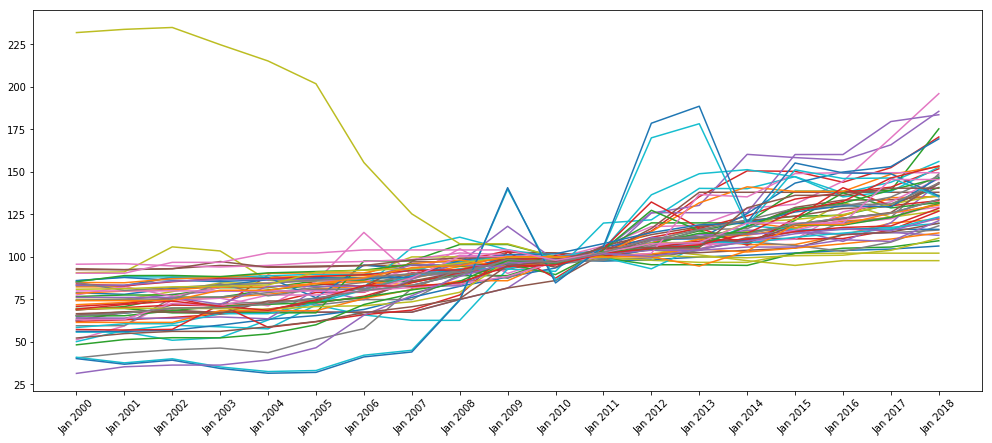

In [33]:
plt.figure(figsize=(17,7))
for name, series in dt2.iteritems():

    plt.plot(dt2.index[0:228:12], series[0:228:12],label=name)
    
plt.xticks(rotation=45)
#plt.legend()
plt.show()
plt.close()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


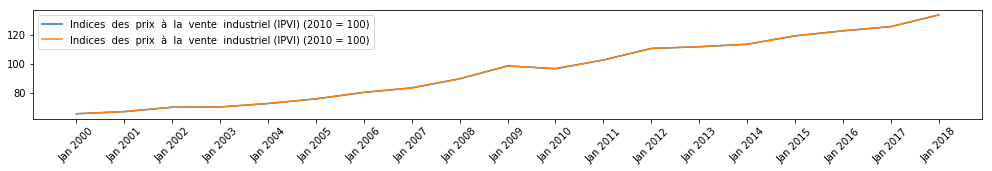

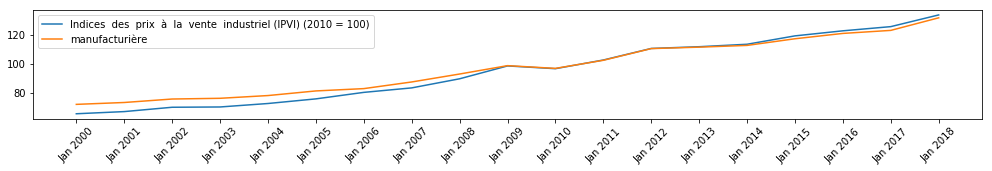

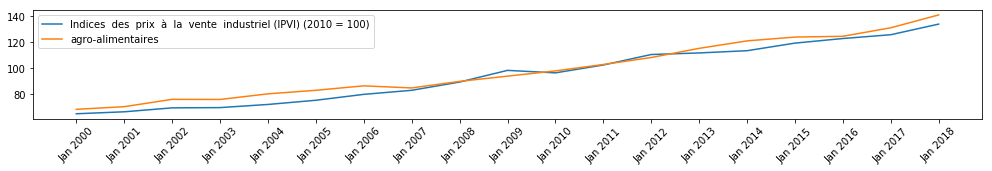

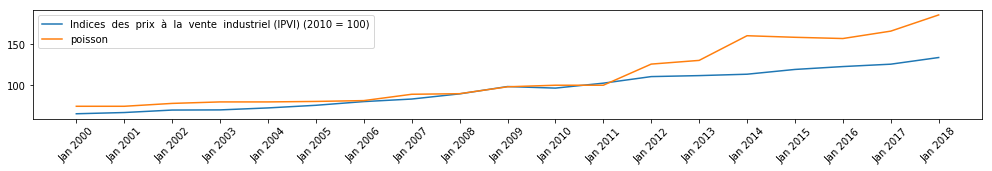

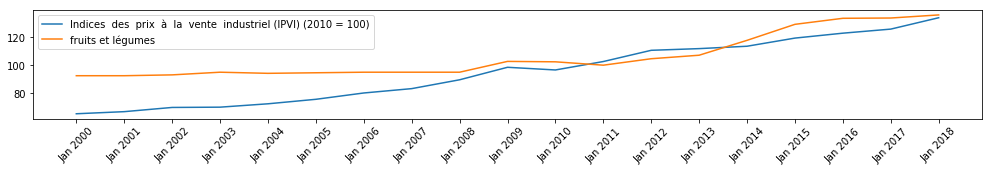

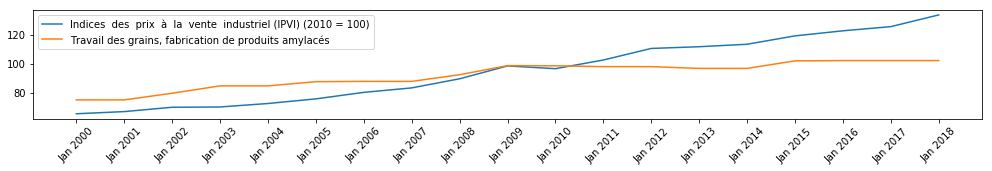

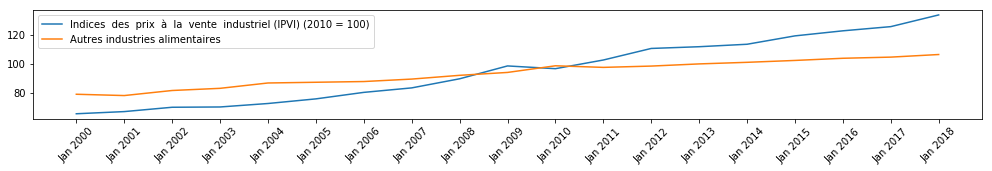

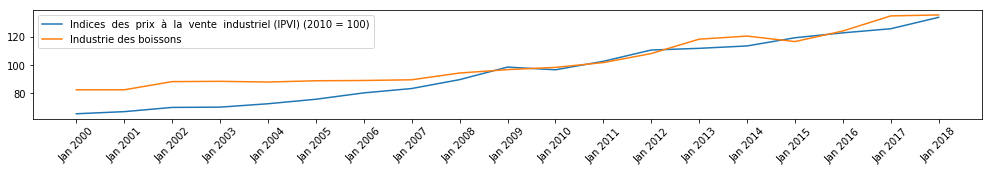

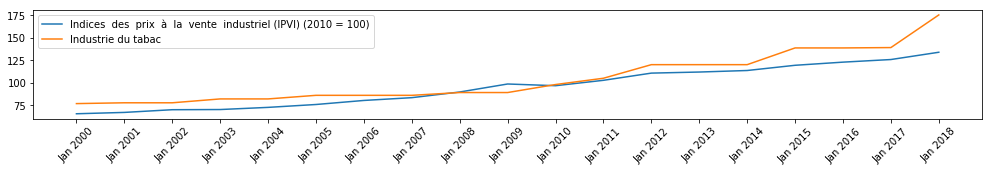

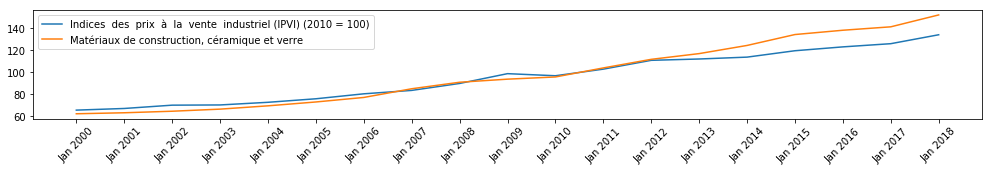

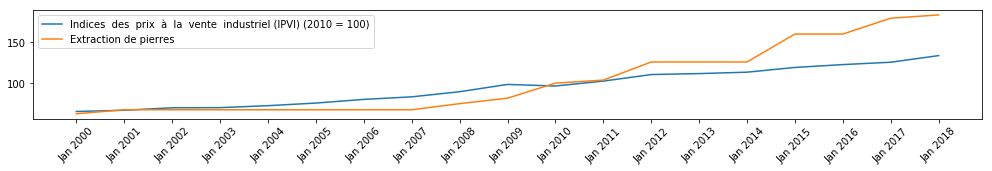

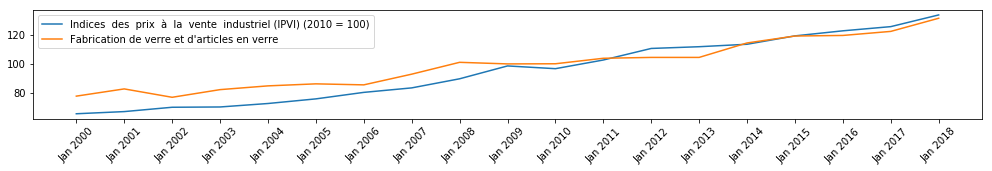

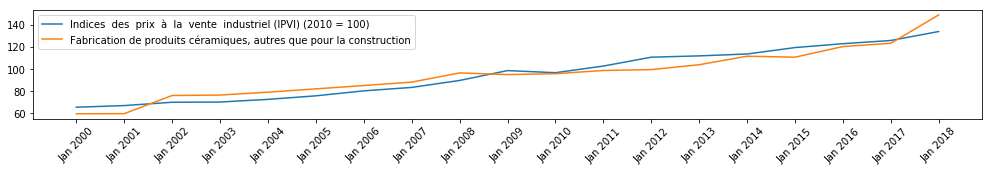

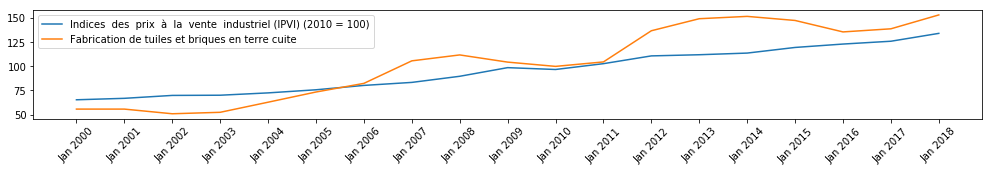

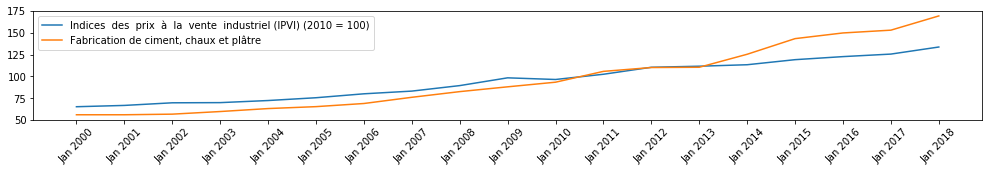

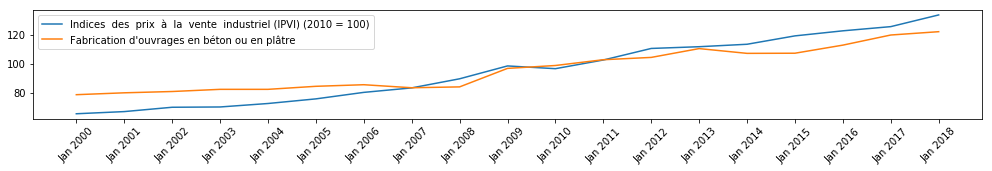

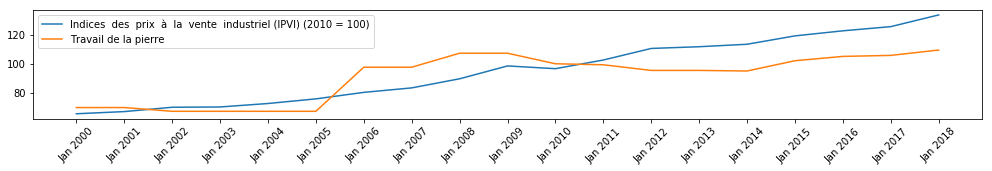

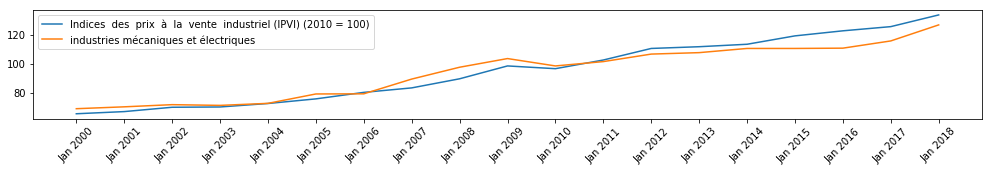

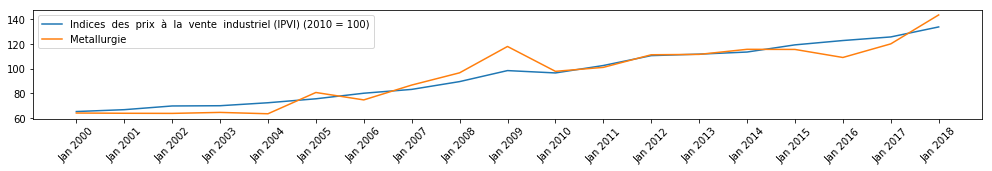

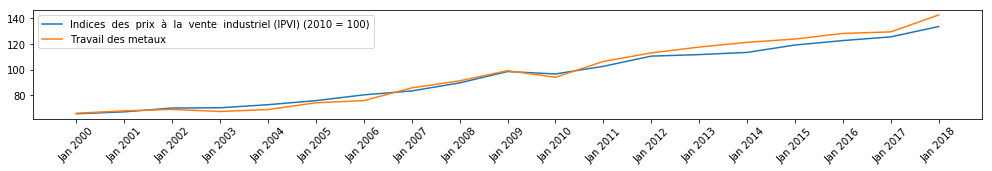

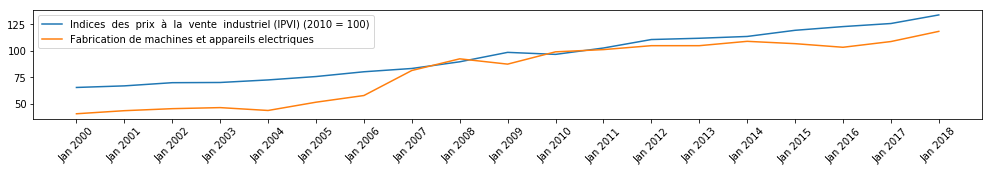

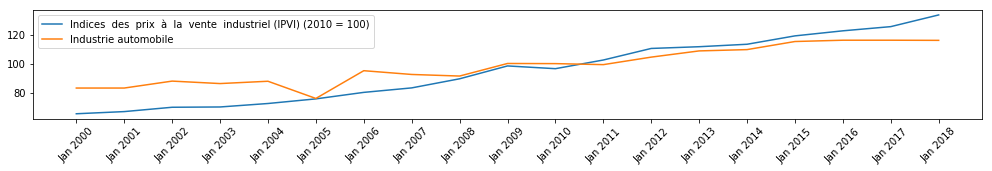

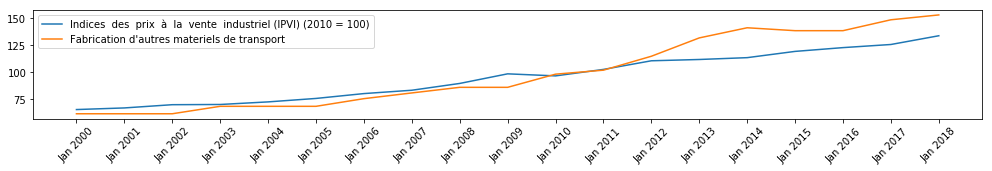

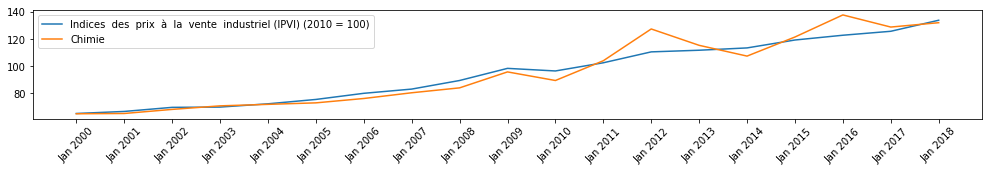

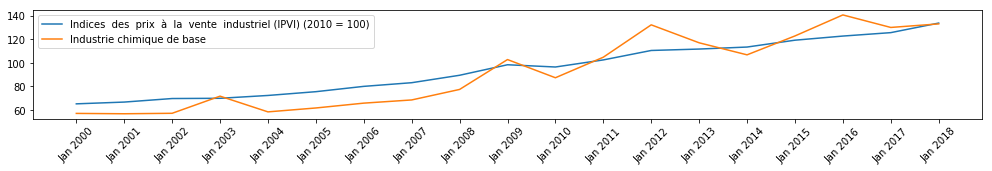

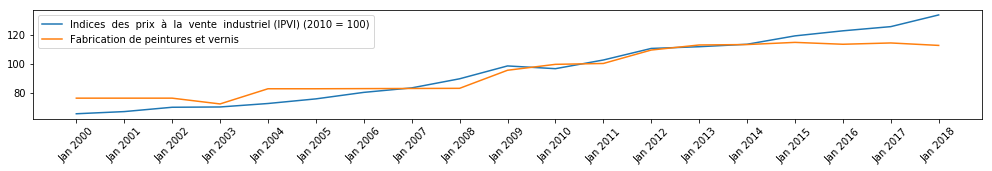

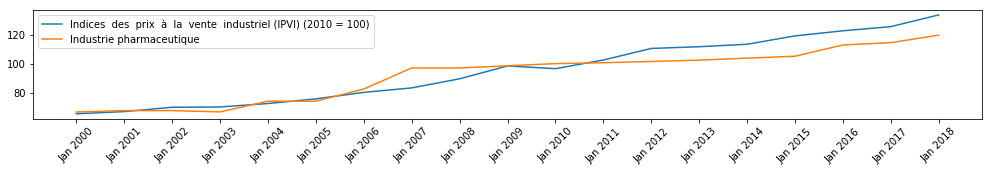

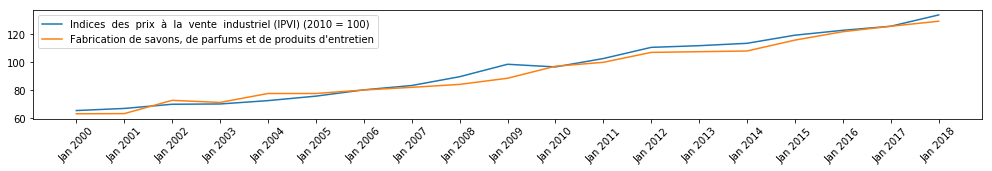

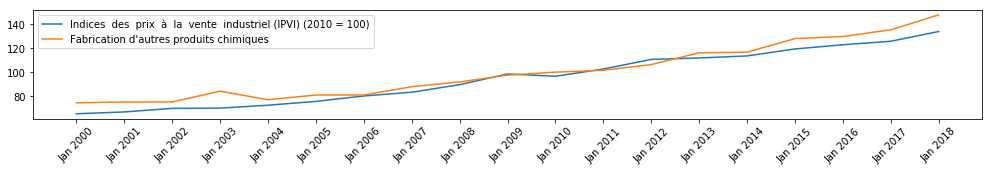

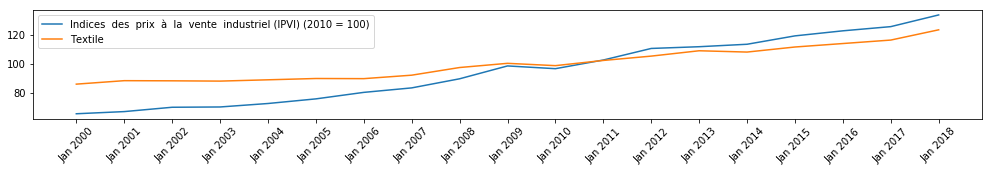

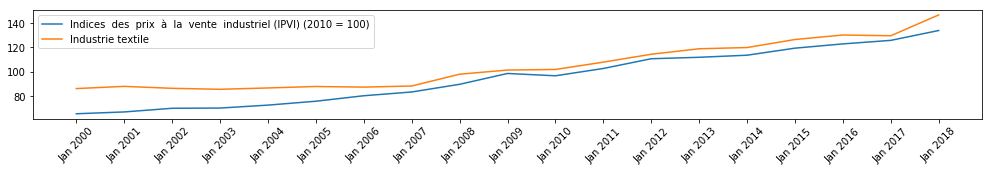

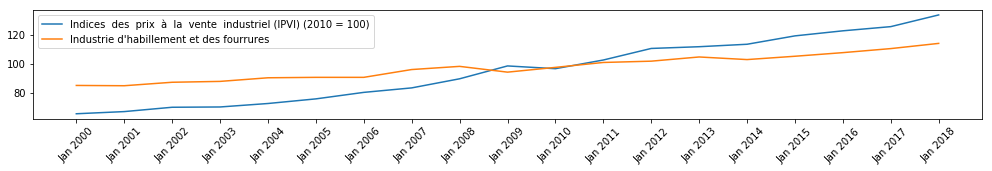

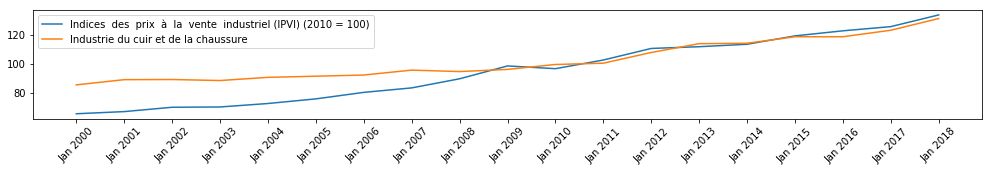

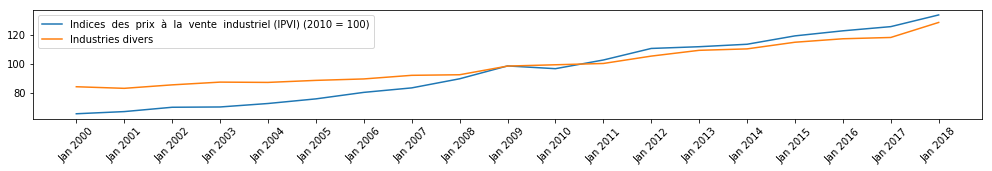

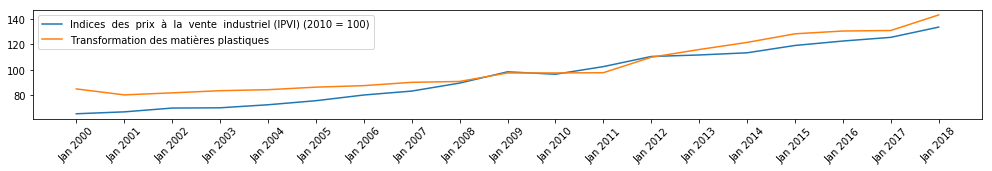

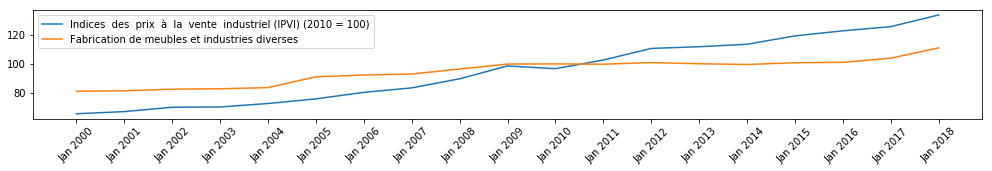

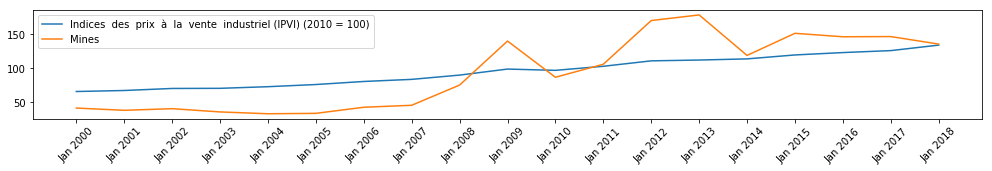

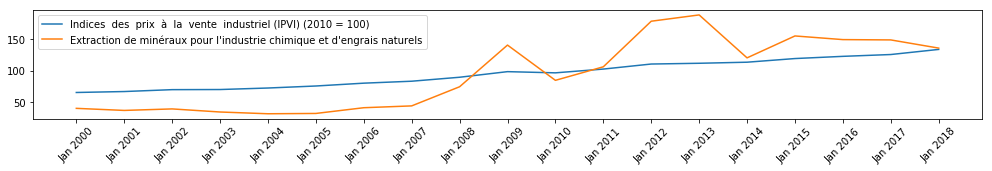

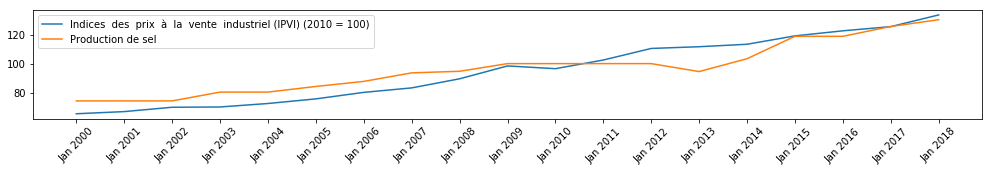

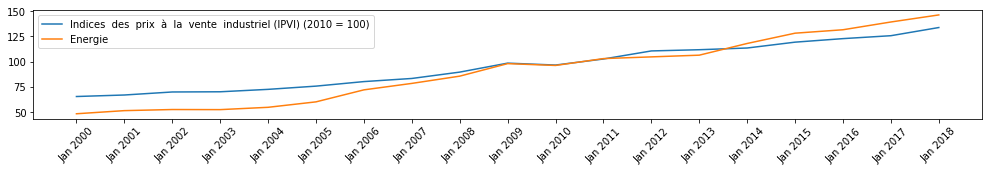

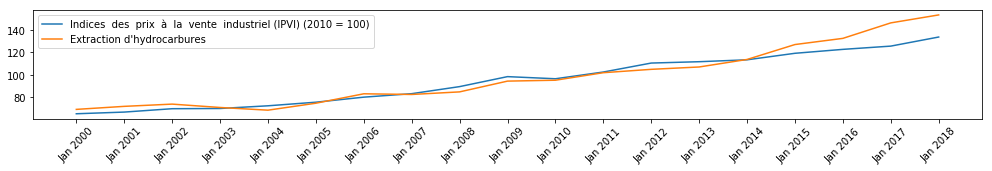

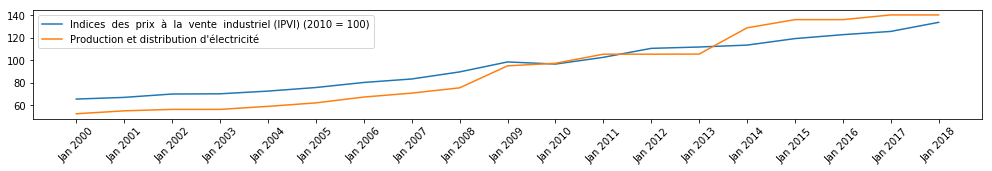

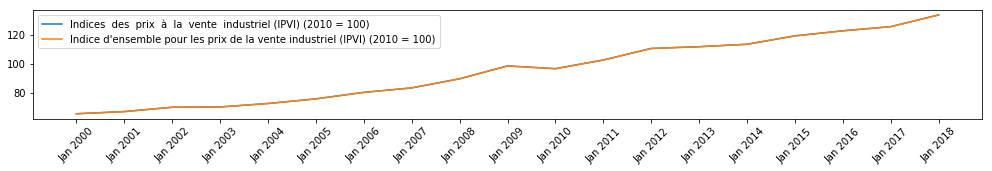

In [31]:
for name, series in dt2.iteritems():
    plt.figure(figsize=(17,2))
    plt.plot(dt2.index[0:228:12],dt2['Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)'][0:228:12],label='Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)')
    plt.plot(dt2.index[0:228:12], series[0:228:12],label=name)
    
    plt.xticks(rotation=45)
    plt.legend()
plt.show()
plt.close()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


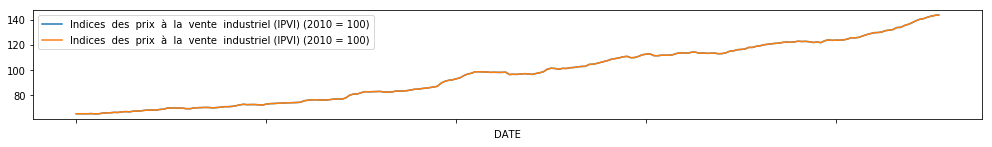

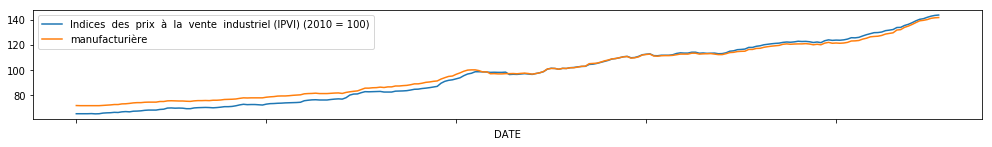

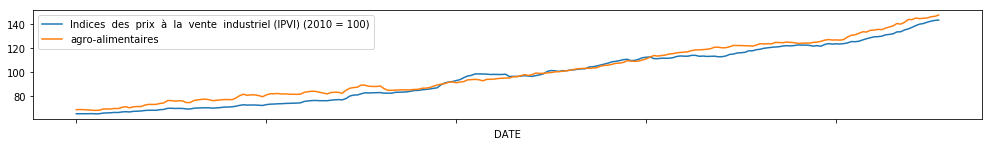

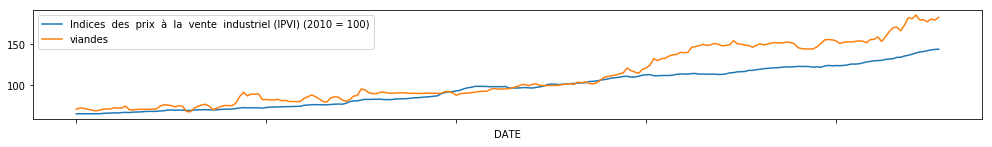

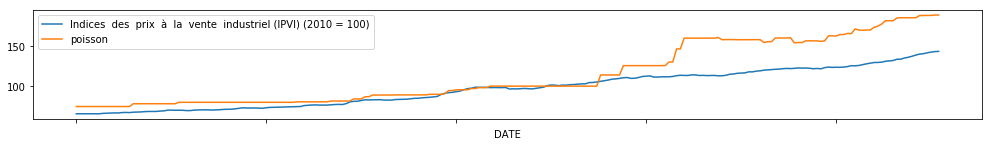

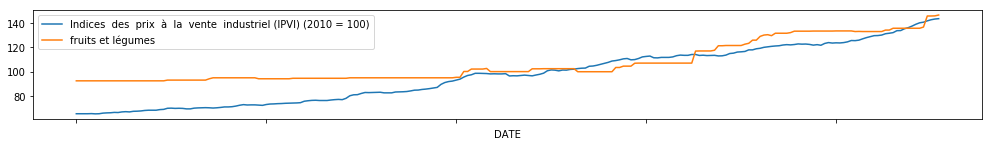

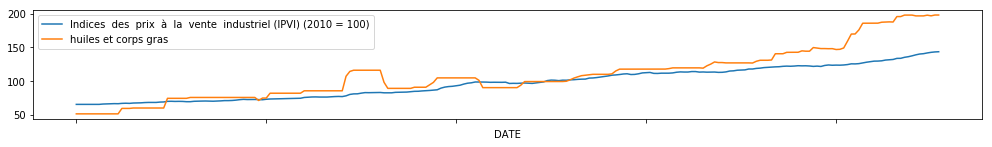

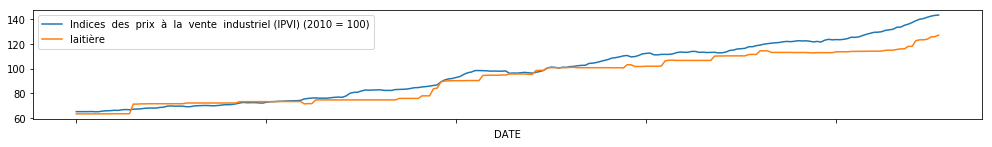

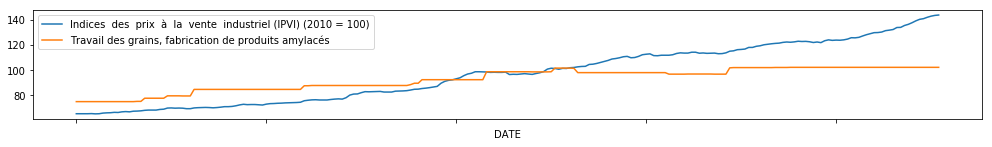

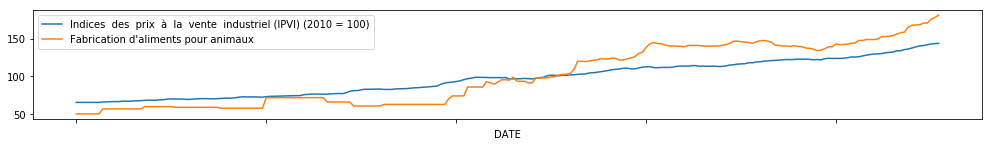

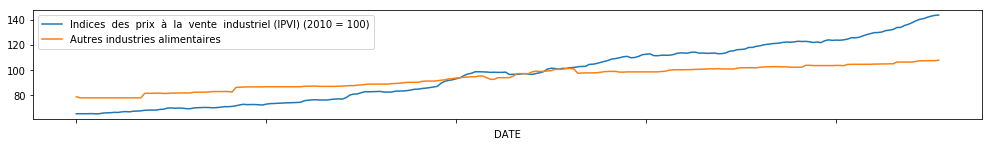

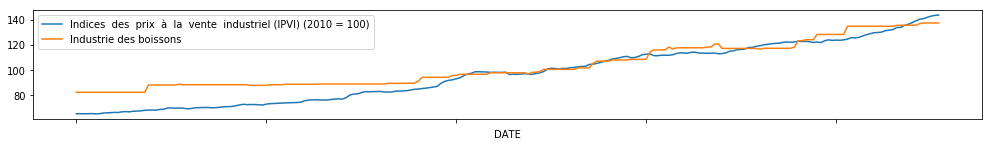

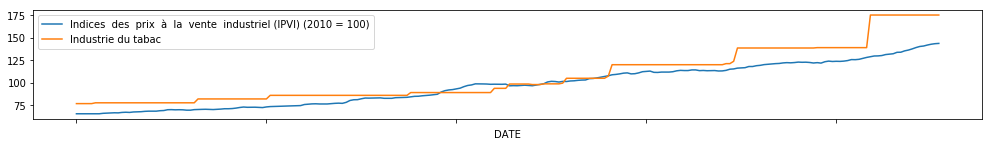

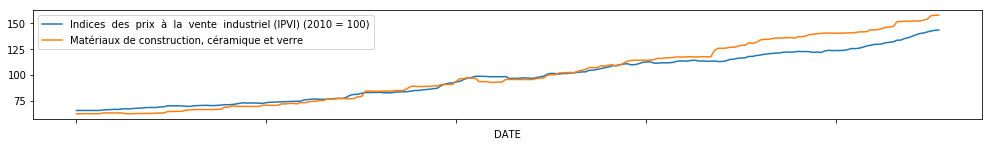

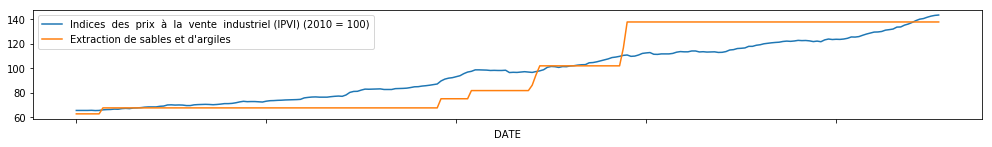

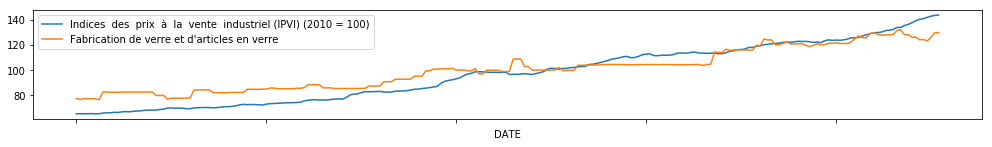

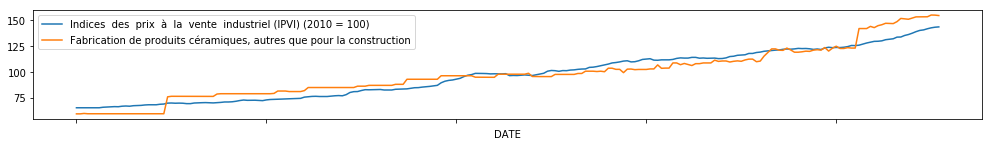

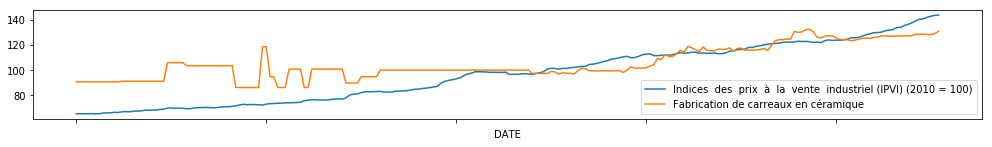

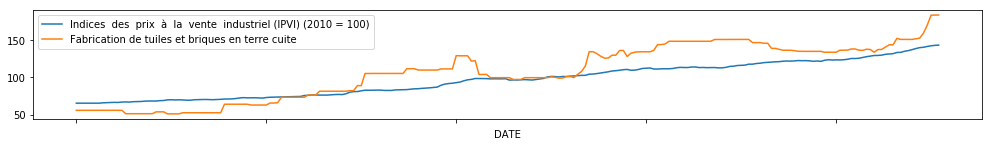

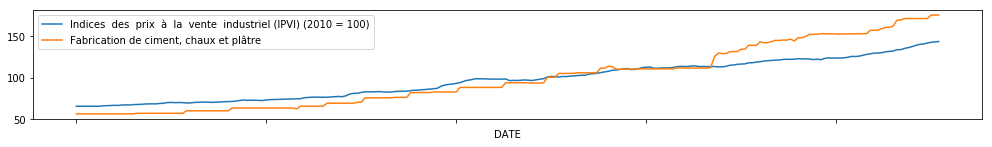

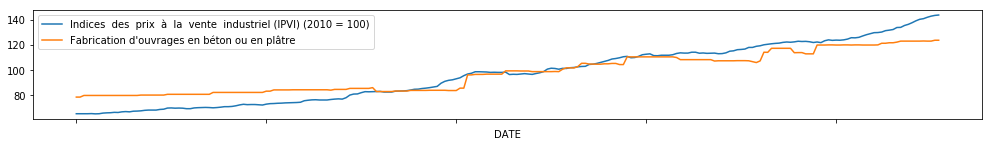

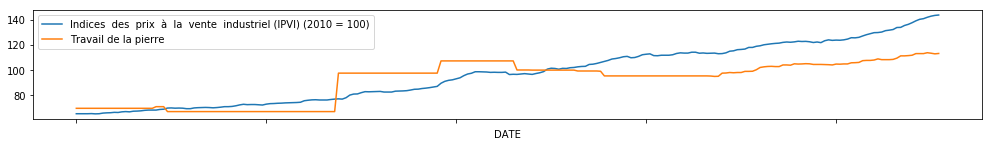

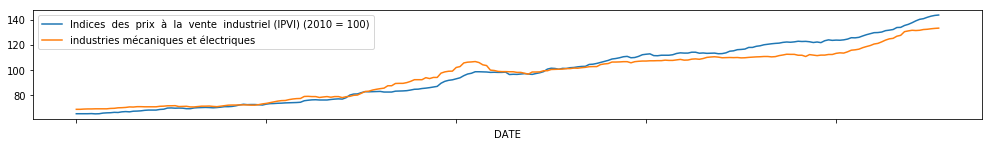

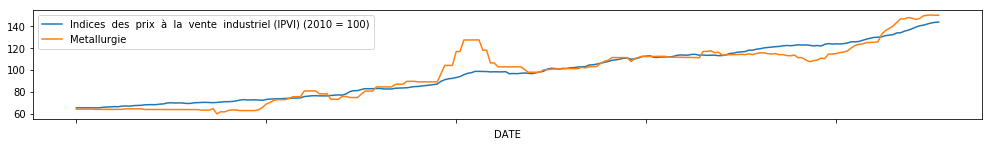

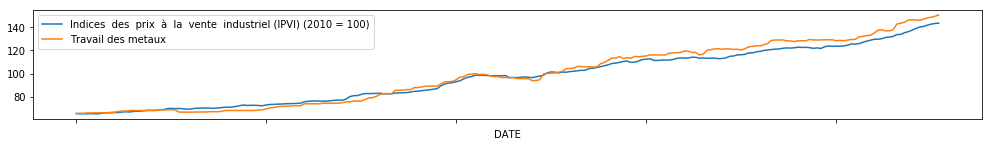

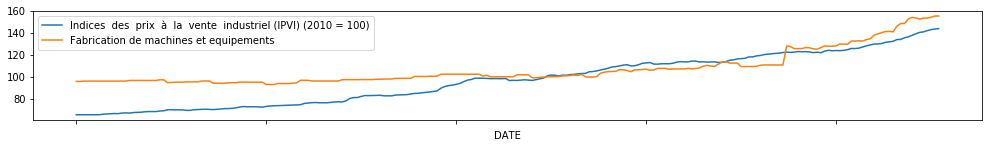

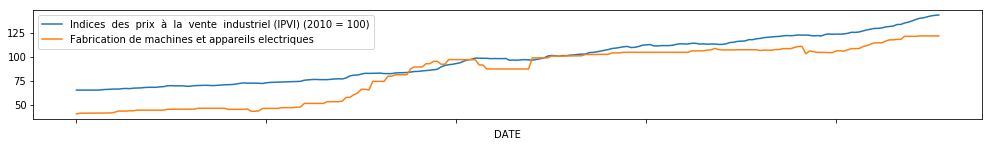

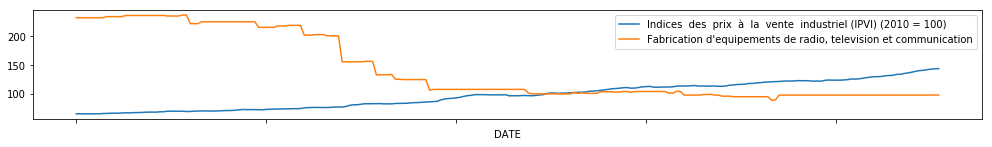

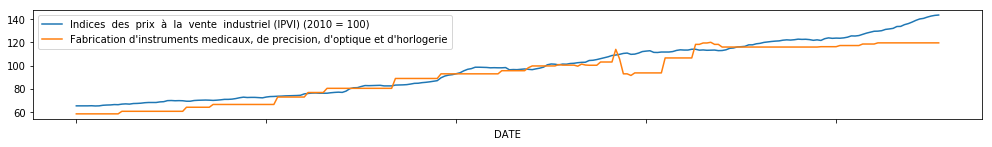

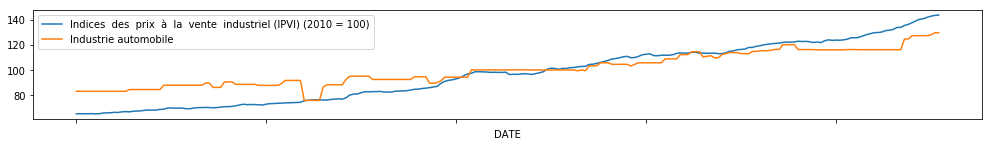

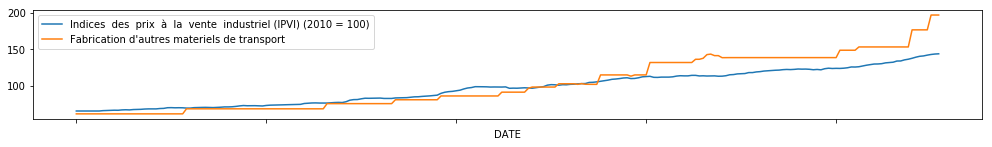

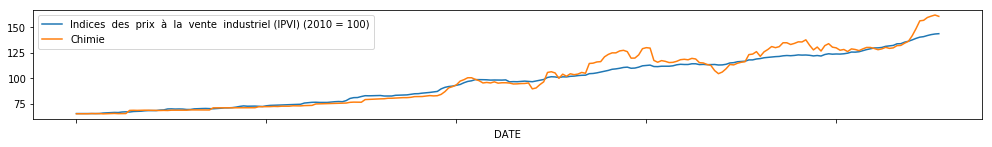

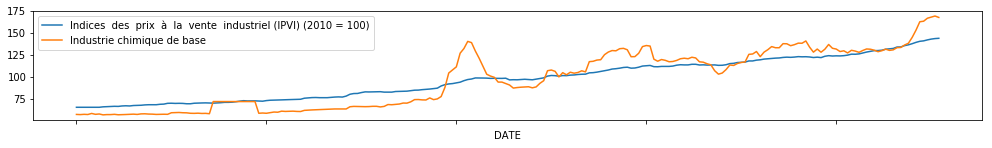

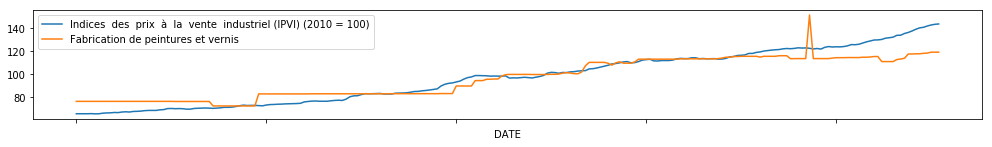

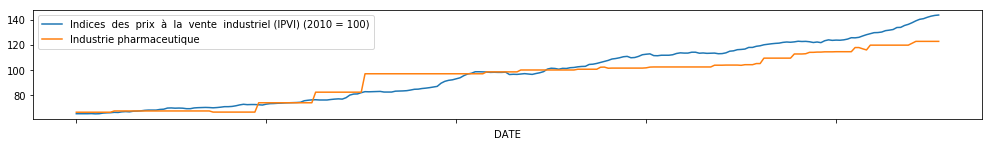

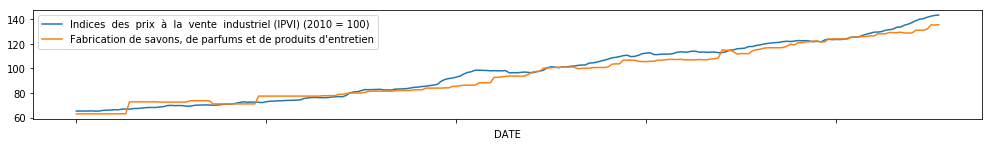

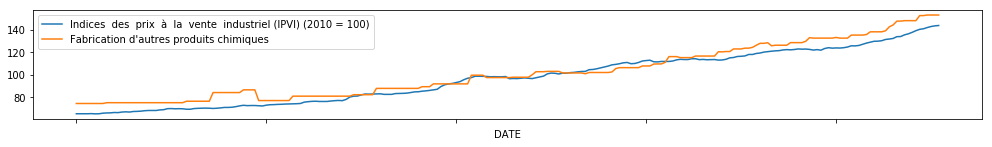

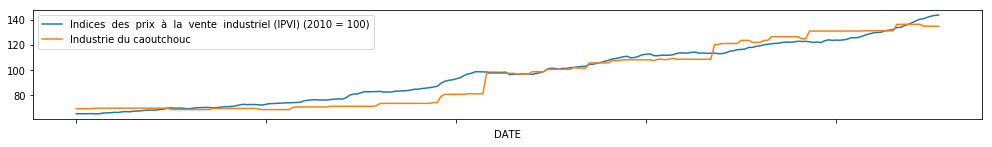

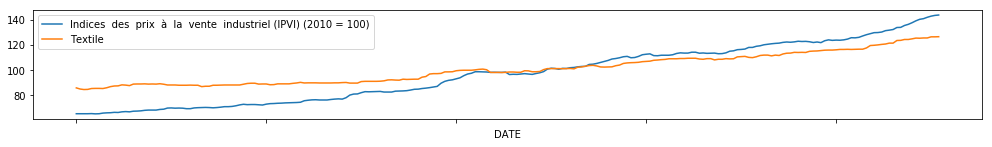

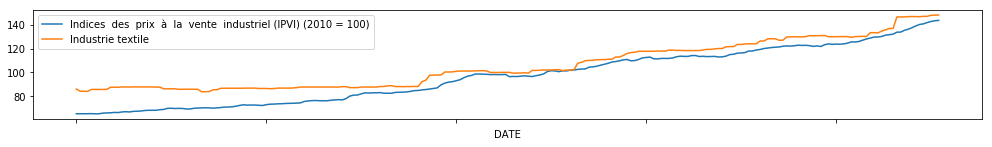

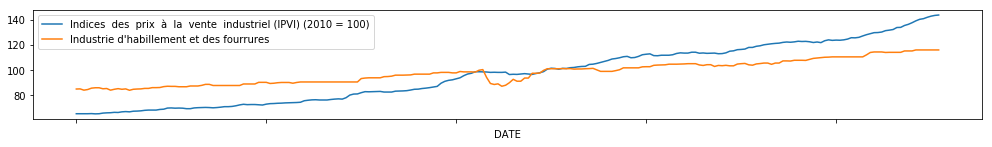

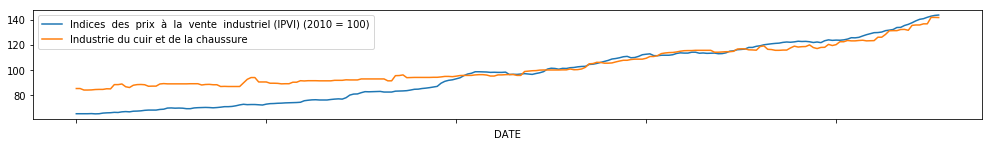

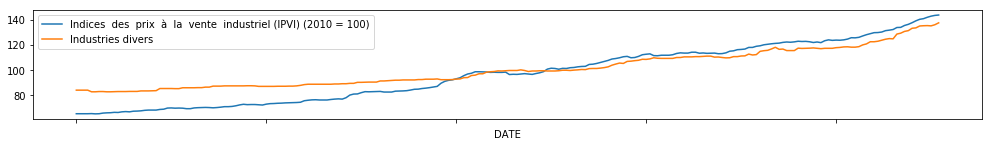

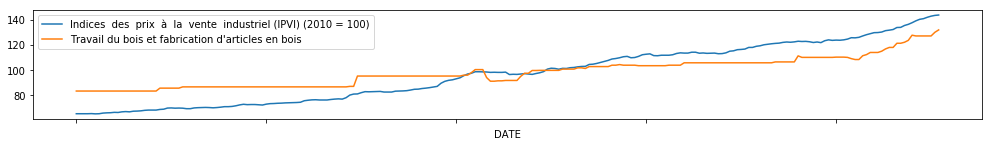

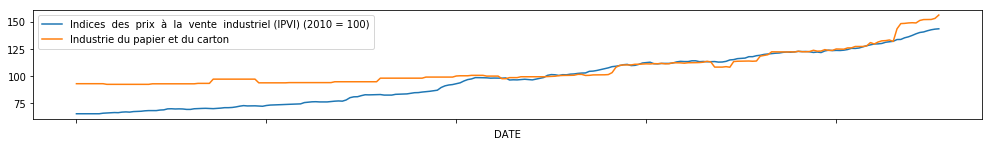

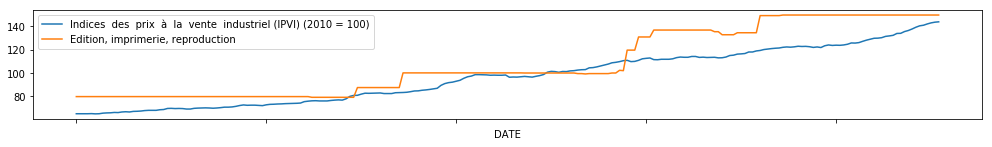

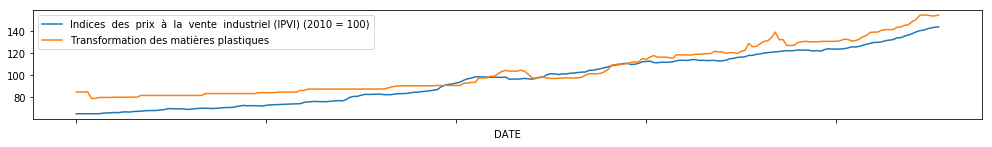

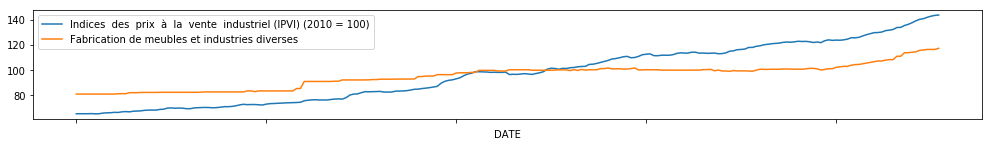

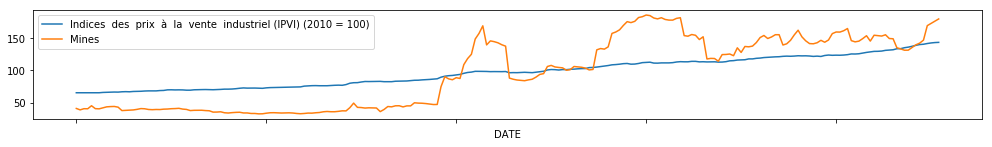

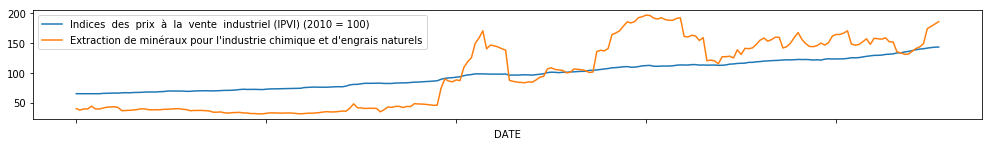

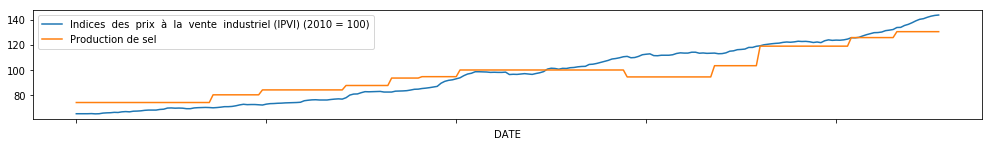

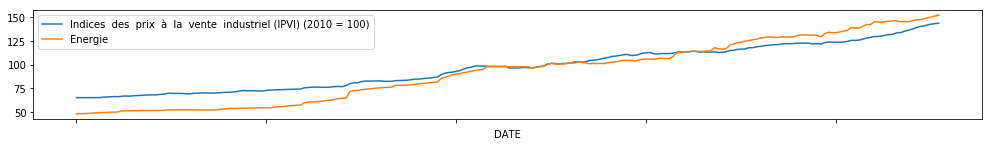

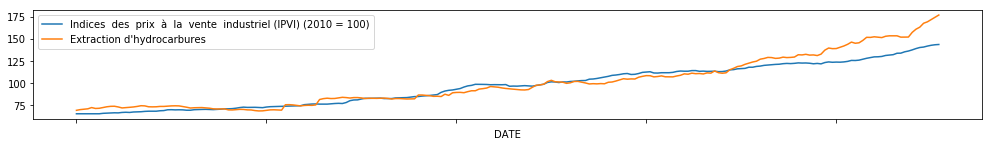

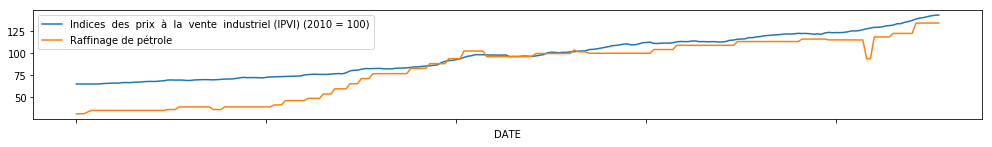

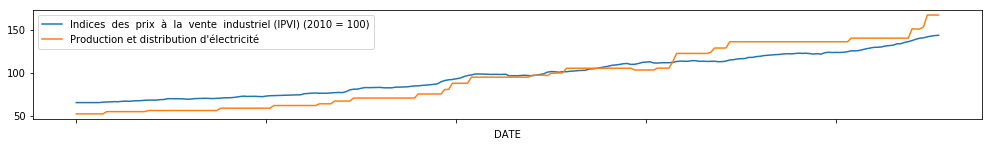

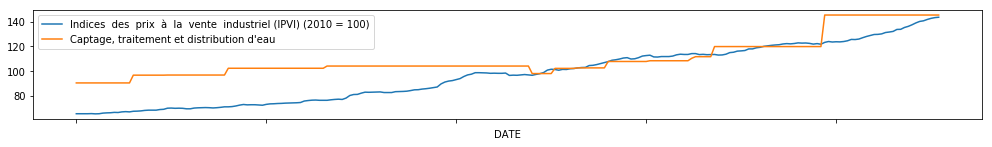

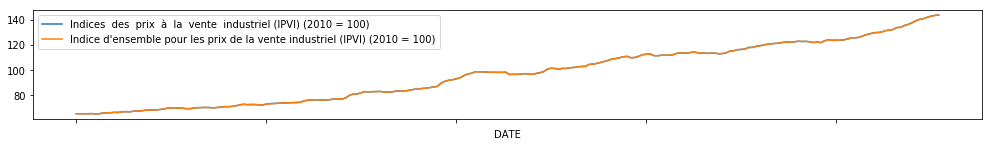

In [30]:
for name, series in dt2.iteritems():
    plt.figure(figsize=(17,2))
    dt2['Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)'].plot()
    series.plot()
    plt.legend()
plt.show()
plt.close()

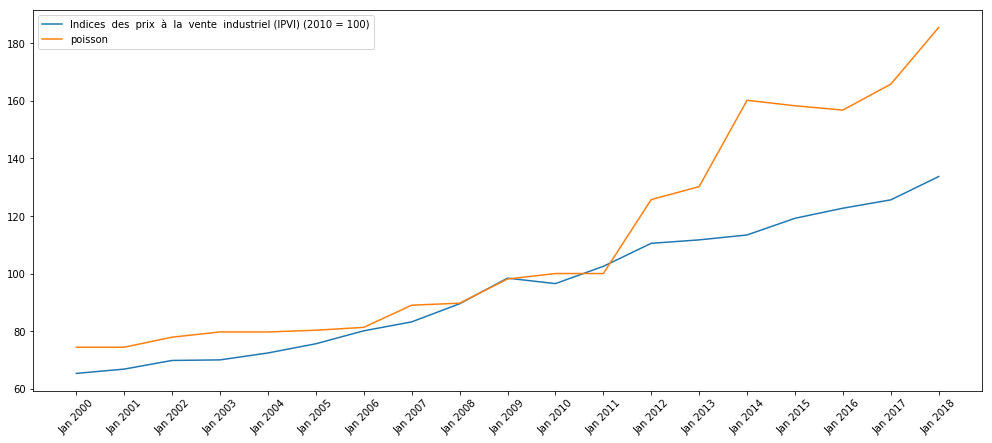

In [36]:
plt.figure(figsize=(17,7))
plt.plot(dt2.index[0:228:12],dt2['Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)'][0:228:12],label='Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)')
plt.plot(dt2.index[0:228:12],dt2['poisson'][0:228:12], label='poisson')

plt.xticks(rotation=45)
plt.legend()
plt.show()

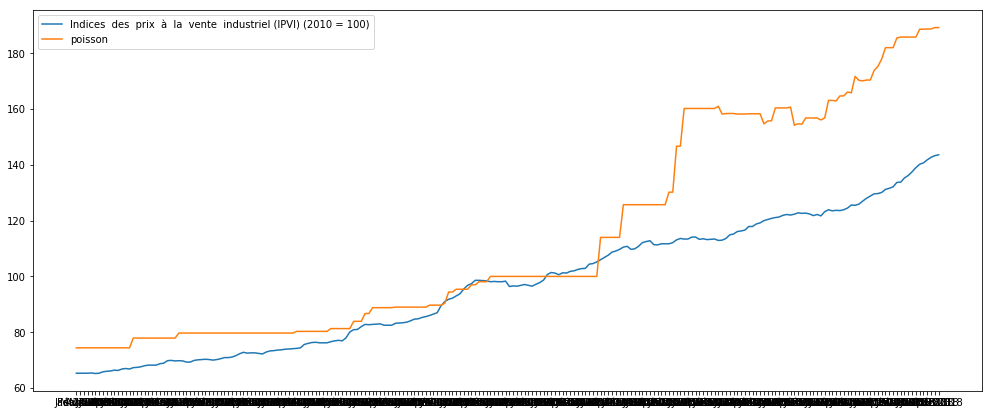

In [50]:
plt.figure(figsize=(17,7))

plt.plot(dt2['Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)'],label='Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)')

plt.plot(dt2['poisson'],label='poisson')
plt.legend()
plt.show()